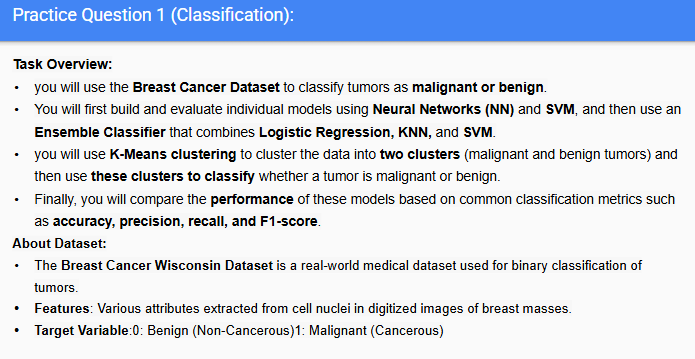

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy import stats
import warnings
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

X = df.drop(columns=["target"])
y = df["target"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# SVM

In [7]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluate performance
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print(" SVM Classifier Performance:")
print(f"Accuracy: {svm_acc:.2f}, Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}, F1-score: {svm_f1:.2f}")

 SVM Classifier Performance:
Accuracy: 0.98, Precision: 0.97, Recall: 1.00, F1-score: 0.99


# Neural Networks

In [8]:
nn_clf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_clf.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8504 - loss: 0.5052 - val_accuracy: 0.9561 - val_loss: 0.2107
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9548 - loss: 0.1969 - val_accuracy: 0.9737 - val_loss: 0.1103
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9676 - loss: 0.1394 - val_accuracy: 0.9737 - val_loss: 0.0826
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9813 - loss: 0.0749 - val_accuracy: 0.9737 - val_loss: 0.0709
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9764 - loss: 0.0713 - val_accuracy: 0.9737 - val_loss: 0.0660
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9734 - loss: 0.0663 - val_accuracy: 0.9825 - val_loss: 0.0641
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9866 - loss: 0.0615 - val_accuracy: 0.9825 - val_loss: 0.0612
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9798 - loss: 0.0789 - val_accuracy: 0.9825 - val_loss: 0.0623
E

In [9]:
# Make predictions
y_pred_nn = (nn_clf.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

print(" Neural Network Classifier Performance:")
print(f"Accuracy: {nn_accuracy:.2f}, Precision: {nn_precision:.2f}, Recall: {nn_recall:.2f}, F1-score: {nn_f1:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 Neural Network Classifier Performance:
Accuracy: 0.97, Precision: 0.97, Recall: 0.99, F1-score: 0.98


# Logistic Regression

In [10]:
# Apply K-Means clustering to the training data (X_train)
kmeans = KMeans(n_clusters=2, random_state=42)
y_labels = kmeans.fit_predict(X_train)  # Get cluster labels
y_labels

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [11]:
# Train a classifier to predict the 'target' using the cluster
log_clf = LogisticRegression()
log_clf.fit(X_train, y_labels)

LogisticRegression()

In [12]:
# Predict on the test set
clusters_test = kmeans.predict(X_test)

In [13]:
clusters_test

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int32)

In [14]:
y_pred_log = log_clf.predict(X_test)

In [15]:
# Evaluate
log_acc = accuracy_score(clusters_test, y_pred_log)
log_precision = precision_score(clusters_test, y_pred_log)
log_recall = recall_score(clusters_test, y_pred_log)
log_f1 = f1_score(clusters_test, y_pred_log)

print(" Logistic Regression Performance:")
print(f"Accuracy: {log_acc:.2f}, Precision: {log_precision:.2f}, Recall: {log_recall:.2f}, F1-score: {log_f1:.2f}")

 Logistic Regression Performance:
Accuracy: 0.98, Precision: 0.97, Recall: 0.97, F1-score: 0.97


# KNN

In [16]:
KNN_clf = KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train, y_labels)
y_pred_knn = KNN_clf.predict(X_test)

In [17]:
# Evaluate KNN Performance
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print("KNN Classifier Performance:")
print(f"Accuracy: {knn_acc:.2f}, Precision: {knn_precision:.2f}, Recall: {knn_recall:.2f}, F1-score: {knn_f1:.2f}")


KNN Classifier Performance:
Accuracy: 0.08, Precision: 0.05, Recall: 0.03, F1-score: 0.04


# Ensemble Classifier

In [18]:
ensemble_clf = VotingClassifier(estimators=[
    ('logistic', log_clf),
    ('knn', KNN_clf),
    ('svm', svm_clf)
], voting='hard')

ensemble_clf.fit(X_train, y_train)
y_pred_ensemble = ensemble_clf.predict(X_test)


In [19]:
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble)
ensemble_recall = recall_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)

print("Ensemble Classifier Performance:")
print(f"Accuracy: {ensemble_acc:.2f}, Precision: {ensemble_precision:.2f}, Recall: {ensemble_recall:.2f}, F1-score: {ensemble_f1:.2f}")

Ensemble Classifier Performance:
Accuracy: 0.98, Precision: 0.97, Recall: 1.00, F1-score: 0.99




---



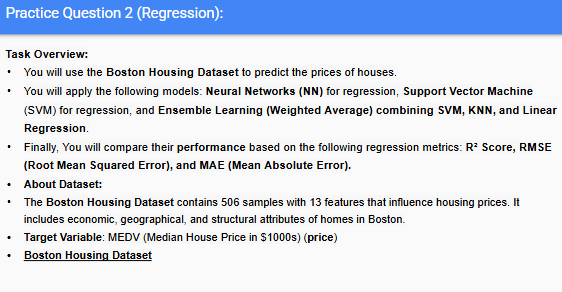

In [21]:
from sklearn.datasets import fetch_california_housing


In [44]:
boston = fetch_california_housing()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["target"] = boston.target


In [35]:
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)

# Evaluate
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test ,y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print(" SVM Regressor Performance:")
print(f"R2 Score: {r2_svm:.2f}, MSE: {rmse_svm:.2f}, MAE: {mae_svm:.2f}")

 SVM Regressor Performance:
R2 Score: 0.73, MSE: 0.60, MAE: 0.40


# Neural Network Regressor

In [38]:
nn_reg = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
nn_reg.compile(optimizer='adam', loss='mse')
nn_reg.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.0792 - val_loss: 0.4000
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3822 - val_loss: 0.3741
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3607 - val_loss: 0.3778
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4273 - val_loss: 0.3409
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3356 - val_loss: 0.3532
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3194 - val_loss: 0.3189
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3015 - val_loss: 0.3091
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2938 - val_loss: 0.3075
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2915 - val_loss: 0.2977
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2898 - val_loss: 0.2985
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2856 - val_loss: 0.3001
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

In [42]:
# Make Predictions
y_pred_nn_reg = nn_reg.predict(X_test).flatten()


r2_nn_reg = r2_score(y_test, y_pred_nn_reg)
rmse_nn_reg = np.sqrt(mean_squared_error(y_test, y_pred_nn_reg))
mae_nn_reg = mean_absolute_error(y_test, y_pred_nn_reg)
print(" Neural Network Regressor Performance:")
print(f"R2 Score: {r2_nn_reg:.2f}, MSE: {rmse_nn_reg:.2f}, MAE: {mae_nn_reg:.2f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
 Neural Network Regressor Performance:
R2 Score: 0.81, MSE: 0.50, MAE: 0.33


# SVM Regressor

In [43]:
svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)
y_pred_svm_reg = svm_reg.predict(X_test)

# Evaluate
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print(" SVM Regressor Performance:")
print(f"R2 Score: {r2_svm:.2f}, MSE: {rmse_svm:.2f}, MAE: {mae_svm:.2f}")

 SVM Regressor Performance:
R2 Score: 0.73, MSE: 0.60, MAE: 0.40


# KNN

In [45]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)


# linear Regression

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Ensemble :  SVM - KNN - LINEAR Regression

In [52]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_svm = mean_squared_error(y_test, y_pred_svm)


In [59]:
weights = np.array([1/mse_lin, 1/mse_knn, 1/mse_svm])
weights = weights / weights.sum()

In [58]:
y_pred_weighted_avg = (
    weights[0] * y_pred_lin +
    weights[1] * y_pred_knn+
    weights[2] * y_pred_svm
)

In [60]:
r2_weighted_avg = r2_score(y_test, y_pred_weighted_avg)
rmse_weighted_avg = np.sqrt(mean_squared_error(y_test, y_pred_weighted_avg))
mae_weighted_avg = mean_absolute_error(y_test, y_pred_weighted_avg)

print("Weighted Averaging Performance:")
print(f"R2 Score: {r2_weighted_avg:.2f}, RMSE: {rmse_weighted_avg:.2f}, MAE: {mae_weighted_avg:.2f}")

Weighted Averaging Performance:
R2 Score: 0.71, RMSE: 0.62, MAE: 0.42
